In [1023]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [1024]:
n_task_per_file = 50
n_files = 10
base_dir = "noise_sd=1/vary_r_nomarg_noisesd_1.0_n_200_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [1025]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [1026]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,0.6,full,UV(0.1)
0,1.000000,1.000000,1.000000,0.833333,0.833333,0.666667,0.833333,0.50
1,1.000000,0.833333,1.000000,0.666667,0.833333,0.666667,0.833333,1.00
2,0.666667,1.000000,0.833333,0.857143,0.714286,0.666667,0.666667,0.75
3,1.000000,1.000000,0.833333,0.714286,0.833333,0.571429,0.571429,1.00
4,0.800000,1.000000,1.000000,1.000000,0.800000,0.833333,0.833333,1.00
...,...,...,...,...,...,...,...,...
45,0.833333,1.000000,1.000000,1.000000,0.333333,0.500000,0.500000,0.75
46,0.833333,1.000000,1.000000,0.571429,0.833333,0.833333,0.666667,1.00
47,0.833333,1.000000,1.000000,0.666667,0.833333,0.833333,0.833333,0.75
48,1.000000,1.000000,0.857143,0.833333,0.833333,0.666667,0.833333,0.75


In [1027]:
length_df

,0.1,0.2,0.3,0.4,0.5,0.6,full,UV(0.1)
0,14.476520,12.874089,16.777793,12.512311,12.163981,12.984724,6.598216,21.821449
1,20.287050,13.036346,13.065922,12.538787,13.904929,11.627367,6.691194,21.821449
2,13.979449,14.027256,16.061399,14.178020,13.157488,12.490921,6.622933,21.821449
3,12.927428,11.039155,12.666404,12.653319,11.546800,11.807728,6.589758,21.821449
4,13.858780,10.693634,12.080116,13.467261,11.864161,12.799476,6.609748,21.821449
...,...,...,...,...,...,...,...,...
45,13.620427,12.985681,12.549278,11.731949,12.534792,11.252423,6.728753,21.821449
46,15.072623,10.896378,12.532746,18.681120,13.811197,13.073663,6.796743,21.821449
47,13.162734,12.980661,11.399348,12.191688,12.368145,12.493481,6.671098,21.821449
48,13.518876,10.410438,11.903833,12.549532,15.125651,11.223900,6.569359,21.821449


In [1028]:
MSE_df

,0.1,0.2,0.3,0.4,0.5,0.6,full,UV(0.1)
0,5.099341,4.470659,4.749366,4.519107,4.790274,4.612161,4.612161,4.932240
1,4.594842,4.454604,4.272533,4.539768,4.605258,4.455933,4.455933,4.833717
2,4.720261,4.637741,4.602204,4.411590,4.693325,4.835533,4.835533,4.894462
3,5.251753,5.052439,4.917542,4.893801,4.672628,5.297046,5.297046,5.450622
4,3.949075,4.111491,4.008867,4.360243,4.257752,4.452203,4.452203,4.153955
...,...,...,...,...,...,...,...,...
45,4.176868,4.364989,4.338360,4.551324,4.492494,4.237009,4.237009,4.686019
46,4.246645,3.893309,3.935382,4.093408,4.588586,4.422390,4.422390,4.289868
47,4.496030,4.541523,4.279394,4.491382,4.771425,4.758142,4.758142,4.473737
48,4.809643,4.160210,4.133114,4.603542,4.506055,4.527654,4.527654,4.361937


In [1029]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i], showmeans=True)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        """for j, mean in enumerate(means):
            print(j, mean)
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean"""
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,50)
        elif metric == "MSE":
            axes[i].set_ylim(0,10)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.1        0.902257
0.2        0.879543
0.3        0.882257
0.4        0.807838
0.5        0.703848
0.6        0.635324
full       0.808238
UV(0.1)    0.897000
dtype: float64
Length :
 0.1        14.548956
0.2        12.878231
0.3        13.286796
0.4        13.330636
0.5        12.896204
0.6        12.229652
full        6.726893
UV(0.1)    21.821449
dtype: float64
MSE :
 0.1        4.716243
0.2        4.704293
0.3        4.726894
0.4        4.694518
0.5        4.704464
0.6        4.716420
full       4.716420
UV(0.1)    4.840424
dtype: float64


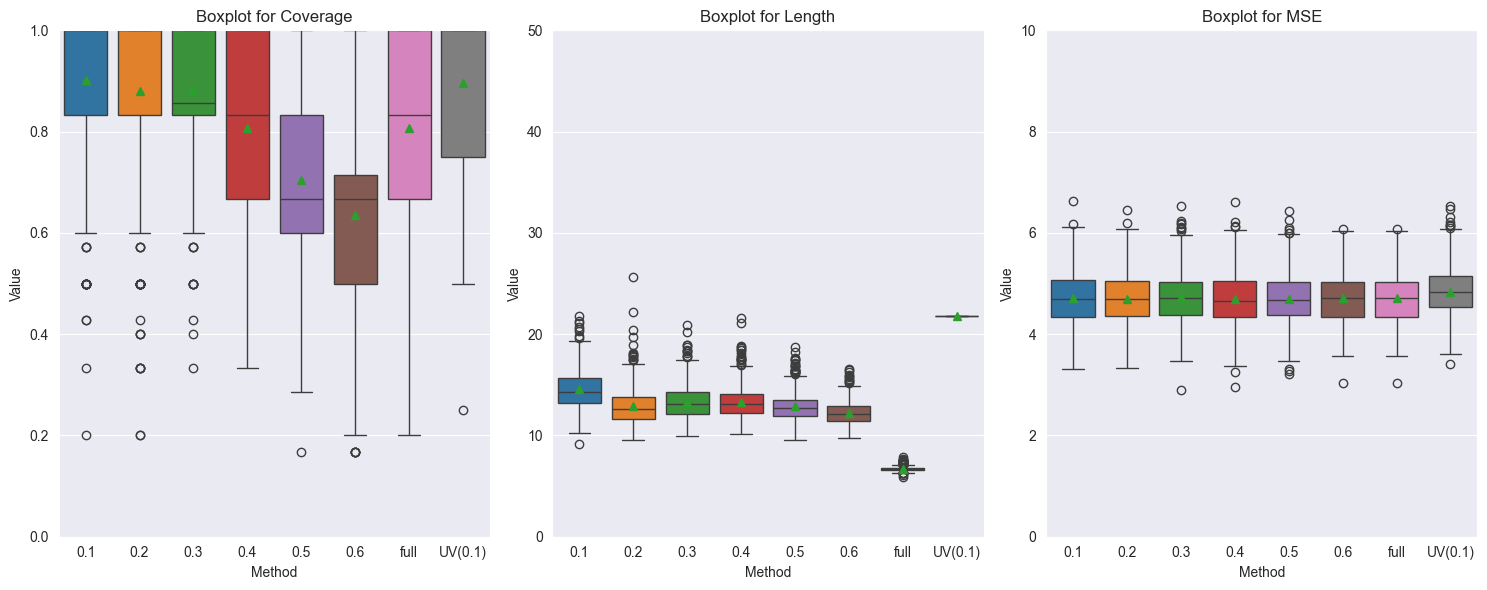

In [1030]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

Coverage :
 0.1        0.882143
0.2        0.775595
0.3        0.645714
0.4        0.627381
0.5        0.583571
0.6        0.561667
0.7        0.551369
0.8        0.513155
full       0.830119
UV(0.1)    0.906250
dtype: float64
Length :
 0.1        40.478966
0.2        26.498739
0.3        22.802259
0.4        20.992620
0.5        18.630494
0.6        16.885335
0.7        15.342226
0.8        13.685779
full        6.687487
UV(0.1)    21.821449
dtype: float64
MSE :
 0.1        4.614567
0.2        4.646398
0.3        4.650816
0.4        4.604210
0.5        4.636576
0.6        4.658551
0.7        4.658513
0.8        4.681474
full       4.681474
UV(0.1)    4.792256
dtype: float64


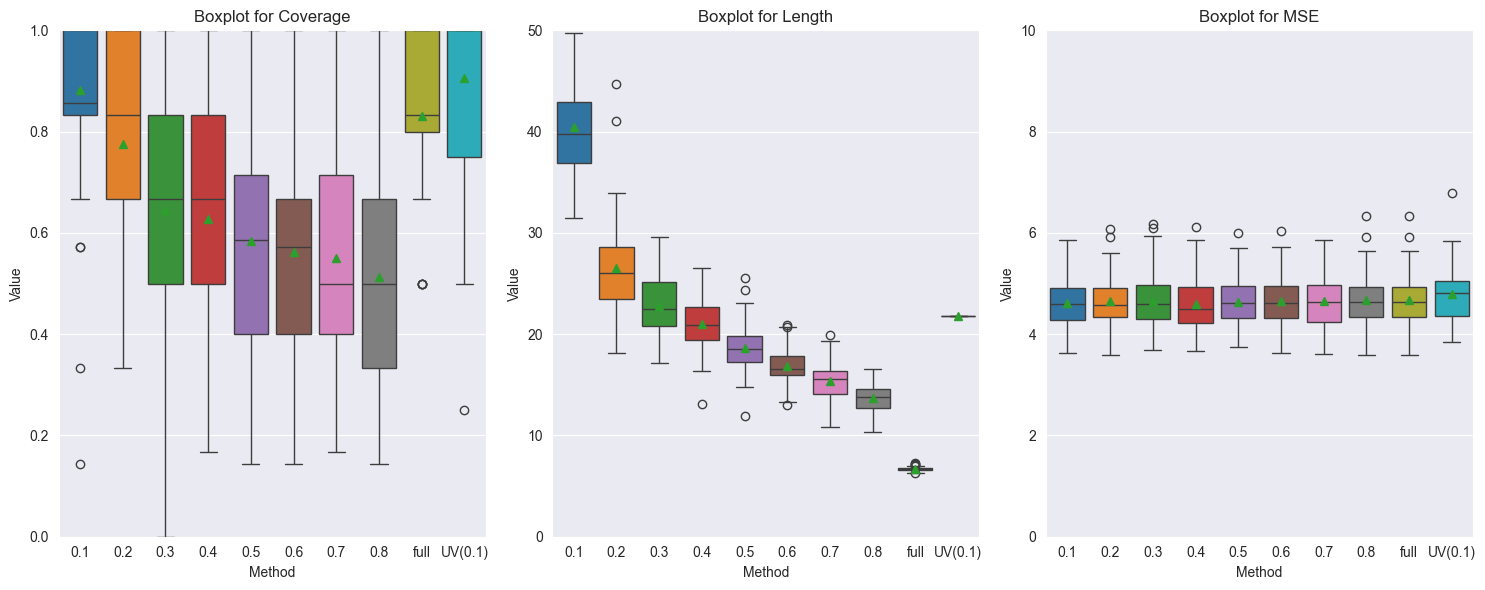

In [737]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])

In [682]:
coverage_df

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,full,UV(0.1)
0,0.857143,0.833333,1.000000,0.833333,1.000000,0.833333,1.000000,0.833333,0.666667,0.75
1,1.000000,1.000000,1.000000,1.000000,1.000000,0.166667,1.000000,0.571429,0.857143,1.00
2,1.000000,0.666667,1.000000,0.571429,0.714286,0.833333,0.833333,0.666667,0.833333,1.00
3,1.000000,1.000000,1.000000,0.571429,1.000000,0.571429,1.000000,0.833333,0.833333,0.75
4,0.800000,1.000000,0.200000,0.600000,1.000000,0.166667,1.000000,1.000000,0.800000,1.00
...,...,...,...,...,...,...,...,...,...,...
21,1.000000,0.800000,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333,0.833333,0.50
22,1.000000,0.833333,1.000000,0.833333,1.000000,1.000000,0.666667,0.166667,0.333333,0.50
23,1.000000,0.833333,1.000000,0.833333,0.500000,1.000000,0.833333,1.000000,1.000000,0.50
24,0.666667,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00


In [397]:
a = np.random.multivariate_normal(mean=np.zeros(3), cov=np.eye(3), size=10)

In [403]:
a

array([[ 1.06793651,  1.36987016,  0.38254673],
       [-0.00676015,  0.04964653,  0.54545289],
       [ 0.36283111,  1.14141412, -0.09072415],
       [-0.35752269,  0.12027834,  1.73155615],
       [-0.2604219 , -0.41158687,  0.85320342],
       [-0.06342349,  0.26980504,  0.54805346],
       [ 3.11418919, -0.40739602,  0.14077256],
       [-1.10491165,  0.58322557, -0.02100113],
       [ 1.94883554,  0.87846771, -0.46144371],
       [-1.41438826,  0.90600893,  1.3235796 ]])

In [406]:
a.max(axis=1) < 1

array([False,  True, False, False,  True,  True, False,  True, False,
       False])

In [410]:
a.min(axis=1) > -1

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False])

In [413]:
np.logical_and(a.min(axis=1) > -1, a.max(axis=1) < 1).sum()

np.int64(3)